<a href="https://colab.research.google.com/github/SwayamBhageria/Project/blob/main/project_jan24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import requests
import json
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
!pip install qiskit_algorithms
!pip install qiskit
!pip install qiskit-machine-learning
from qiskit_machine_learning.algorithms import VQR

from qiskit import QuantumCircuit
from qiskit.circuit.library import PauliFeatureMap
from qiskit.algorithms.optimizers import ADAM
from qiskit.circuit import Parameter
from qiskit.primitives import Sampler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512583 sha256=07a786fc5d48b6c99c4589b8b514dd961f95e089fac2d4d0b7bc58de60233854
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [8]:
api_url = "https://financialmodelingprep.com/api/v3/historical-price-full/MSFT?apikey=25f7fed4fd1ac271bb4f327ed4e69a63"

# Make a GET request to the API
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the response JSON
    data = response.json()
else:
    print(f"Error: Unable to fetch data. Status code: {response.status_code}")

data

{'symbol': 'MSFT',
 'historical': [{'date': '2024-01-29',
   'open': 406.06,
   'high': 409.98,
   'low': 404.33,
   'close': 409.72,
   'adjClose': 409.72,
   'volume': 23284932,
   'unadjustedVolume': 23157134,
   'change': 3.66,
   'changePercent': 0.90134,
   'vwap': 407.99,
   'label': 'January 29, 24',
   'changeOverTime': 0.0090134},
  {'date': '2024-01-26',
   'open': 404.37,
   'high': 406.17,
   'low': 402.43,
   'close': 403.93,
   'adjClose': 403.93,
   'volume': 17803271,
   'unadjustedVolume': 17786700,
   'change': -0.44,
   'changePercent': -0.10881,
   'vwap': 404.02,
   'label': 'January 26, 24',
   'changeOverTime': -0.0010881},
  {'date': '2024-01-25',
   'open': 404.32,
   'high': 407.01,
   'low': 402.5294,
   'close': 404.87,
   'adjClose': 404.87,
   'volume': 21008155,
   'unadjustedVolume': 21021200,
   'change': 0.55,
   'changePercent': 0.13603,
   'vwap': 404.83,
   'label': 'January 25, 24',
   'changeOverTime': 0.0013603},
  {'date': '2024-01-24',
   'ope

In [5]:
api_url = "https://financialmodelingprep.com/api/v3/historical-price-full/AAPL?apikey=25f7fed4fd1ac271bb4f327ed4e69a63"

# Make a GET request to the API
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the response JSON
    data = response.json()
else:
    print(f"Error: Unable to fetch data. Status code: {response.status_code}")

df = pd.json_normalize(data, 'historical', ['symbol']) #convert into a datframe
df.tail()

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol
1252,2019-02-06,43.66,43.89,43.21,43.56,41.81,112958400,112958400,-0.10,-0.22904,43.56,"February 06, 19",-0.002290,AAPL
1253,2019-02-05,43.22,43.77,43.09,43.54,41.79,144406400,144406400,0.32,0.74040,43.47,"February 05, 19",0.007404,AAPL
1254,2019-02-04,41.85,42.92,41.82,42.81,41.09,125982000,125982000,0.96,2.29000,42.52,"February 04, 19",0.022900,AAPL
1255,2019-02-01,41.74,42.24,41.48,41.63,39.96,130672400,130672400,-0.11,-0.26354,41.79,"February 01, 19",-0.002635,AAPL
1256,2019-01-31,41.53,42.25,41.14,41.61,39.94,162958400,162958400,0.08,0.19263,41.67,"January 31, 19",0.001926,AAPL


In [6]:
final_data = df[['open', 'date']][0:500] #forming filtered dataframe
input_sequences = []
labels = []

#Creating input and output data for time series forecasting
for i in range(len(final_data['open'])):
    if i > 1:
        labels.append(final_data['open'][i])
        input_sequences.append(final_data['open'][i-2:i+1].tolist())

#creating train test split
x_train = np.array(input_sequences[0:400])
x_test = np.array(input_sequences[400:])
y_train = np.array(labels[0:400])
y_test = np.array(labels[400:])


In [28]:
print(np.array(input_sequences[0:400]))


[[192.01 194.27 195.22]
 [194.27 195.22 195.42]
 [195.22 195.42 195.02]
 ...
 [137.46 142.13 142.7 ]
 [142.13 142.7  139.9 ]
 [142.7  139.9  136.82]]


In [29]:
print(np.array(labels[0:400]))

[195.22  195.42  195.02  192.3   189.33  186.09  181.27  182.16  186.06
 186.54  184.35  183.92  182.085 181.99  182.15  184.22  187.15  193.9
 194.14  192.49  193.61  195.18  196.1   196.9   196.16  196.09  197.53
 198.02  195.09  193.08  193.11  194.2   193.63  194.45  190.21  189.98
 190.33  189.84  190.9   189.78  189.92  190.87  191.49  191.41  189.89
 190.25  189.57  187.845 187.7   185.82  183.97  182.96  182.35  179.18
 176.38  174.24  175.52  171.    169.35  169.02  166.91  170.37  171.88
 173.05  170.91  175.31  176.04  175.58  176.65  176.75  181.42  180.07
 178.2   178.1   176.81  173.8   173.79  171.09  172.26  171.22  172.02
 169.34  172.62  174.82  174.2   174.67  174.55  179.26  177.52  176.48
 176.48  174.    176.51  179.49  180.07  178.35  175.18  188.4   188.28
 189.49  187.84  184.94  179.7   180.09  177.38  180.67  178.52  177.06
 175.07  172.3   177.14  177.13  178.88  177.97  177.32  179.48  180.87
 179.69  182.13  185.52  191.57  195.04  196.24  196.06  194.67  

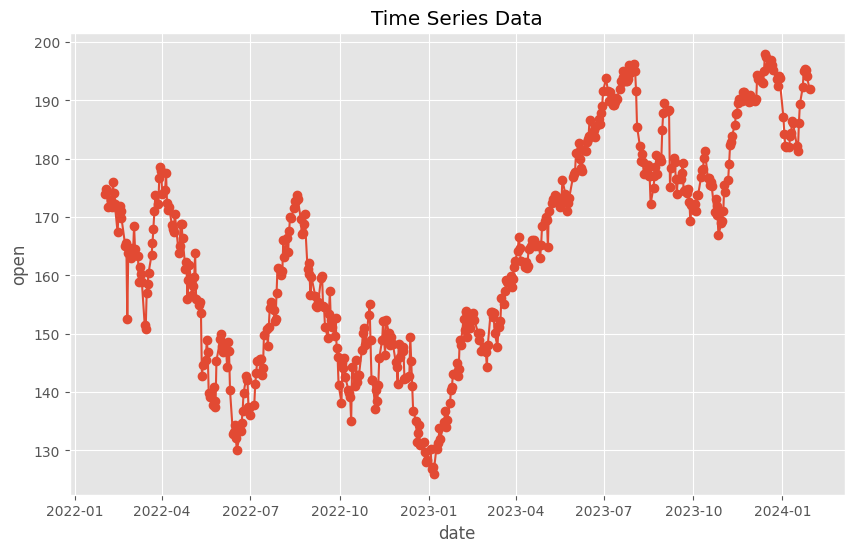

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['date'][0:500], df['open'][0:500], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('date')
plt.ylabel('open')
plt.title('Time Series Data')

# Display the plot
plt.grid(True)
plt.show()

In [40]:
num_features =  3
feature_map = PauliFeatureMap(feature_dimension = num_features, reps = 2)
optimizer = ADAM(maxiter = 100)

In [41]:
def ans(n, depth):
    qc = QuantumCircuit(n)
    for j in range(depth):
        for i in range(n):
            param_name = f'theta_{j}_{i}'
            theta_param = Parameter(param_name)
            qc.rx(theta_param, i)
            qc.ry(theta_param, i)
            qc.rz(theta_param, i)
    for i in range(n):
        if i == n-1:
            qc.cx(i, 0)
        else:
            qc.cx(i, i+1)
    return qc

In [42]:
ansatz = ans(num_features, 5) #anstaz(num_qubits=num_features, reps=5)

#creating train test split
x_train = np.array(input_sequences[0:400])
x_test = np.array(input_sequences[400:])
y_train = np.array(labels[0:400])
y_test = np.array(labels[400:])

In [ ]:
vqr = VQR(
    feature_map = feature_map,
    ansatz = ansatz,
    optimizer = optimizer,
)


vqr.fit(x_train,y_train)
vqr_mse = mean_squared_error(y_test, vqr.predict(x_test))

# Calculate root mean squared error
vqr_rmse = np.sqrt(vqr_mse)

In [44]:
model = Sequential()
model.add(Dense(64,activation = 'relu', input_shape = (4,)))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_data = (x_test,y_test))

loss = model.evaluate(x_test, y_test)
prediction = model.predict(x_test)

ann_mse = mean_squared_error(y_test, prediction.flatten())
ann_rmse = np.sqrt(ann_mse)

Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 4), found shape=(None, 3)


In [34]:
print(y_train.shape)

(400,)


In [20]:
print(x_train)

[[192.01 194.27 195.22]
 [194.27 195.22 195.42]
 [195.22 195.42 195.02]
 ...
 [137.46 142.13 142.7 ]
 [142.13 142.7  139.9 ]
 [142.7  139.9  136.82]]


In [21]:
print(y_train.shape)

(400,)


In [18]:
model = Sequential()
model.add(Dense(64,activation = 'relu', input_shape = (4,)))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_data = (x_test,y_test))

loss = model.evaluate(x_test, y_test)
prediction = model.predict(x_test)

ann_mse = mean_squared_error(y_test, prediction.flatten())
ann_rmse = np.sqrt(ann_mse)

Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 4), found shape=(None, 3)
